## Install packages

## Import packages

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import igraph as ig

## Load network

In [2]:
g = ig.Graph.Read_GML('karate.gml')

## Plot network

In [3]:
#creating labels
labels = np.arange(1,g.vcount()+1)
labels = [str(i) for i in labels]

#setting the new labels
# g.vs['label'] = labels

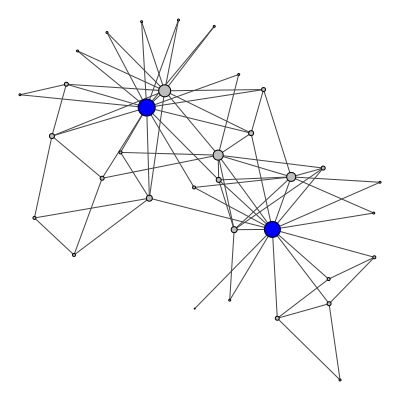

In [4]:
#plotting network
visual_style = {}
visual_style["vertex_size"] = [i for i in g.vs.degree()]
visual_style["vertex_color"] = ['gray' if i<15 else 'blue' for i in g.vs.degree()]
visual_style["bbox"] = (400, 400)
visual_style["margin"] = 20
visual_style['vertex_shape'] = 'circle'
ig.plot(g, **visual_style)

## Get parameters

In [5]:
print(f'The network has: \n')
print(f'nodes -> {g.vcount()} ') 
print(f'links -> {g.ecount()} edges') 
print(f'maximum degree -> {g.vs.maxdegree()}') 
print(f'minimum degree -> {min(g.vs.degree())} ') 
print(f'average degree -> {int(sum(g.vs.degree())/g.vcount())} ') 
print(f'maximum links -> {(g.vcount()*(g.vcount()-1))/2} ') 
print(f'density -> {(sum(g.vs.degree()))/(g.vcount()*(g.vcount()-1)):.6} ')
print(f'diameter -> {g.diameter()}')

The network has: 

nodes -> 34 
links -> 78 edges
maximum degree -> 17
minimum degree -> 1 
average degree -> 4 
maximum links -> 561.0 
density -> 0.139037 
diameter -> 5


## Degree distribuition

In [6]:
df = pd.DataFrame(data=g.vs.degree(), columns=['degree'])

<AxesSubplot:xlabel='degree', ylabel='Probability'>

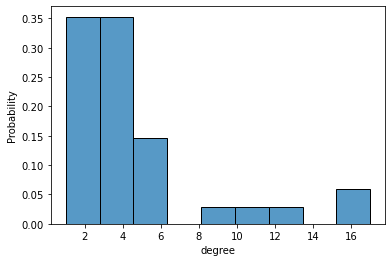

In [7]:
sns.histplot(df['degree'],stat='probability')

<AxesSubplot:xlabel='degree', ylabel='Density'>

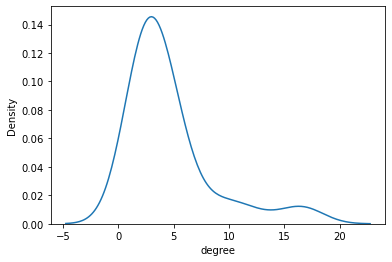

In [8]:
sns.kdeplot(df['degree'])

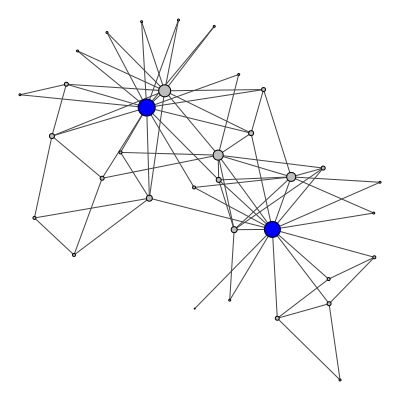

In [9]:
#plotting network
visual_style = {}
visual_style["vertex_size"] = [i for i in g.vs.degree()]
visual_style["vertex_color"] = ['gray' if i<15 else 'blue' for i in g.vs.degree()]
visual_style["bbox"] = (400, 400)
visual_style["margin"] = 20
visual_style['vertex_shape'] = 'circle'
layout = g.layout('kamada_kawai',).rotate(90)
ig.plot(g, layout=layout, **visual_style)